# "backends" and Jupyter notebooks

Some people use matplotlib interactively from the python shell and have plotting windows pop up when they type commands. Some people embed matplotlib into graphical user interfaces like wxpython or pygtk to build rich applications. Others use matplotlib in batch scripts to generate postscript images from some numerical simulations, and still others in web application servers to dynamically serve up graphs. Each of these approaches requires matplotlib to generate the figures, but a different [**backend**](https://matplotlib.org/faq/usage_faq.html#what-is-a-backend) to actually show or export the generated images. There are two types of backends: user interface backends (for use in pygtk, wxpython, tkinter, qt4, or macosx; also referred to as “interactive backends”) and hardcopy backends to make image files (PNG, SVG, PDF, PS; also referred to as “non-interactive backends”).


Matplotlib has multiple backends. The backends allow mpl to be used on a variety of platforms with a variety of GUI toolkits (GTK, Qt, Wx, etc.), all of them written so that most of the time, you will not need to care which backend you are using, even though it does change the aesthetics and some other factors. **If code works on other machines, but not on yours, check the respectively used backends and see if they differ!**

To check the currently used backend:

In [2]:
import matplotlib

print(matplotlib.__version__)
print(matplotlib.get_backend())

3.0.3
module://ipykernel.pylab.backend_inline


Normally we wouldn't need to think about this too much, but IPython/Jupyter notebooks behave a touch differently than "normal" python. In JupyterLab notebooks we 
either want to use the `inline` backend, to statically embed figures in the notebook or use the `widget` backend to get interactive figures. Another alternative is to rely on Tkinter, and use the ``tk``-backend, which opens plots in a popup-window.

To be able to use the interactive ``widget``-backend, you may have to re-install ``ipympl`` using pip inside your environment: ``pip install ipympl``. Afterwards, you may have to rebuild your jupyter-lab using the commands ``jupyter lab clean`` followed by ``jupyter lab build``.

We can do this in two ways:

     
1. ``matplotlib.use("backend_name")``
   - Figures will only be shown when you call ``plt.show()``.


2. The IPython ``%matplotlib backend_name`` "magic" command (which also calls ``plt.ion()``, putting mpl into *interactive mode*)
   - Figures will be shown automatically by IPython, even if you don't call ``plt.show()``.

**You can only call this function after importing matplotlib, but you have to call it before importing ``matplotlib.pyplot``** (and may need to restart the kernel if you need to change it afterwards)

Here, we'll use the second method since the interactive inline display does not yet work in jupyter lab (it works perfectly in the pure notebook). However, we still use `plt.show()` 
to demonstrate how the code would look inside a plain python script.

In [5]:
%matplotlib widget
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

FigureCanvasNbAgg()

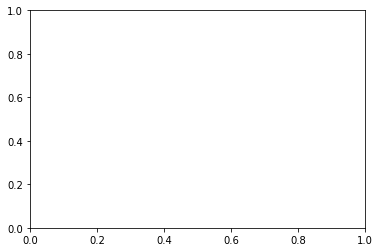

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

In [3]:
!conda list | grep tk

tk                        8.6.9             h84994c4_1001    conda-forge


In [4]:
%matplotlib tk
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

In [1]:
import matplotlib
%matplotlib widget
import matplotlib.pyplot as plt

### Interactive mode

Use of an interactive backend (see What is a backend?) permits–but does not by itself require or ensure–plotting to the screen. Whether and when plotting to the screen occurs, and whether a script or shell session continues after a plot is drawn on the screen, depends on the functions and methods that are called, and on the *interactive*-variable.

In [2]:
matplotlib.is_interactive()

True

In [3]:
import matplotlib.pyplot as plt
plt.ion()
plt.plot([1.6, 2.7])

FigureCanvasNbAgg()

In [4]:
plt.title('new text')

Text(0.5, 1.0, 'new text')

In [9]:
import matplotlib.pyplot as plt
plt.ioff()
plt.plot([1.6, 2.7])

In [10]:
plt.show()

FigureCanvasNbAgg()

In [8]:
plt.title('new text')

Text(0.5, 1.0, 'new text')

If you're working with MPL on the terminal and use respective backends, the show() command blocks the input of additional commands until you manually kill the plot window.

What good is this–being forced to use a blocking function? Suppose you need a script that plots the contents of a file to the screen. You want to look at that plot, and then end the script. Without some blocking command such as show(), the script would flash up the plot and then end immediately, leaving nothing on the screen.

In addition, non-interactive mode delays all drawing until show() is called; this is more efficient than redrawing the plot each time a line in the script adds a new feature.

We'll use the ``inline``-mode in this lecture

In [11]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## More Information

More Information can be found in Matplotlib's FAQ: https://matplotlib.org/faq/usage_faq.html#what-is-a-backend